In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv


In [2]:
data=pd.read_csv('/kaggle/input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv')

In [3]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
X=data.values
X=X[:,1:-1]
from sklearn.model_selection import train_test_split


y=np.array(data['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [6]:
print(X.shape,y.shape)

(11500, 178) (11500,)


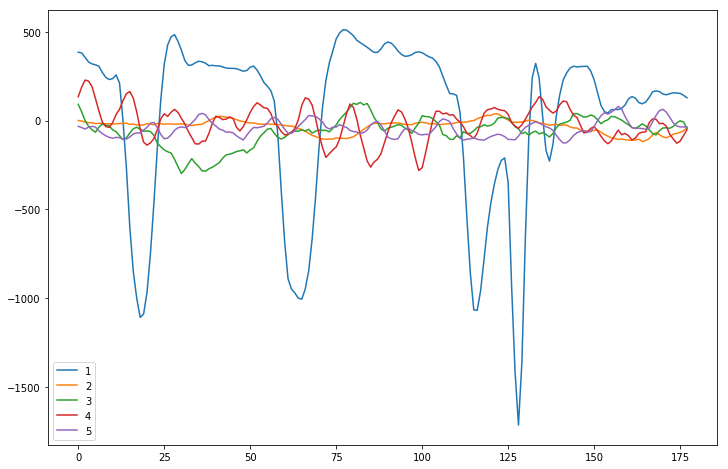

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [8]:
model=Sequential()


model.add(Dense(512,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               23552     
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],10,100,verbose=2,validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]))

Train on 9200 samples, validate on 2300 samples
Epoch 1/100
 - 7s - loss: 0.3745 - accuracy: 0.8380 - val_loss: 0.3274 - val_accuracy: 0.8450
Epoch 2/100
 - 6s - loss: 0.2946 - accuracy: 0.8563 - val_loss: 0.3176 - val_accuracy: 0.8533
Epoch 3/100
 - 6s - loss: 0.2531 - accuracy: 0.8722 - val_loss: 0.2645 - val_accuracy: 0.8673
Epoch 4/100
 - 6s - loss: 0.2412 - accuracy: 0.8771 - val_loss: 0.2682 - val_accuracy: 0.8649
Epoch 5/100
 - 6s - loss: 0.2179 - accuracy: 0.8876 - val_loss: 0.2742 - val_accuracy: 0.8612
Epoch 6/100
 - 6s - loss: 0.2086 - accuracy: 0.8928 - val_loss: 0.2717 - val_accuracy: 0.8670
Epoch 7/100
 - 6s - loss: 0.2016 - accuracy: 0.8999 - val_loss: 0.2718 - val_accuracy: 0.8675
Epoch 8/100
 - 6s - loss: 0.1804 - accuracy: 0.9099 - val_loss: 0.2612 - val_accuracy: 0.8746
Epoch 9/100
 - 6s - loss: 0.1716 - accuracy: 0.9176 - val_loss: 0.2765 - val_accuracy: 0.8807
Epoch 10/100
 - 6s - loss: 0.1545 - accuracy: 0.9260 - val_loss: 0.2959 - val_accuracy: 0.8759
Epoch 11/10

Epoch 87/100
 - 6s - loss: 0.0172 - accuracy: 0.9958 - val_loss: 0.6761 - val_accuracy: 0.8957
Epoch 88/100
 - 6s - loss: 0.0257 - accuracy: 0.9931 - val_loss: 0.5486 - val_accuracy: 0.8950
Epoch 89/100
 - 6s - loss: 0.0131 - accuracy: 0.9965 - val_loss: 0.7786 - val_accuracy: 0.8943
Epoch 90/100
 - 6s - loss: 0.0137 - accuracy: 0.9966 - val_loss: 0.7194 - val_accuracy: 0.9001
Epoch 91/100
 - 6s - loss: 0.0375 - accuracy: 0.9939 - val_loss: 0.5798 - val_accuracy: 0.8876
Epoch 92/100
 - 6s - loss: 0.0268 - accuracy: 0.9942 - val_loss: 0.5698 - val_accuracy: 0.8908
Epoch 93/100
 - 6s - loss: 0.0151 - accuracy: 0.9968 - val_loss: 0.6439 - val_accuracy: 0.8911
Epoch 94/100
 - 6s - loss: 0.0145 - accuracy: 0.9965 - val_loss: 0.7758 - val_accuracy: 0.8905
Epoch 95/100
 - 5s - loss: 0.0121 - accuracy: 0.9979 - val_loss: 0.7511 - val_accuracy: 0.8930
Epoch 96/100
 - 6s - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.6932 - val_accuracy: 0.8932
Epoch 97/100
 - 6s - loss: 0.0194 - accuracy: 0.99

In [11]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

(2300, 5)

In [12]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [13]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [14]:
yp.shape
yo.shape

(2300,)

In [15]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [16]:
np.unique(Y_test)

array([0., 1.], dtype=float32)

In [17]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [18]:
yo.shape

(2300,)

In [19]:
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [20]:
np.unique(yo)

array([0., 1.])

In [21]:
np.unique(yp)

array([0., 1.])

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(yo,yp)

0.9808695652173913